# Importing Libraries

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Dataset

In [157]:
# https://www.kaggle.com/datasets/vetrirah/customer?resource=download&select=sample_submission.csv

## Dataset Loading

In [158]:
train_data = pd.read_csv('D:\\Personal_Github\\Classification\\train-set.csv')
test_data = pd.read_csv('D:\\Personal_Github\\Classification\\test-set.csv')

## Overview of Dataset Elements

In [159]:
print(train_data.head())
print(train_data.describe())

   CustomerID  Gender Married  Age Graduated     Profession  WorkExperience  \
0      462809    Male      No   22        No     Healthcare             1.0   
1      462643  Female     Yes   38       Yes       Engineer             NaN   
2      466315  Female     Yes   67       Yes       Engineer             1.0   
3      461735    Male     Yes   67       Yes         Lawyer             0.0   
4      462669  Female     Yes   40       Yes  Entertainment             NaN   

  SpendingScore  FamilySize    Category Segmentation  
0           Low         4.0  Category 4            D  
1       Average         3.0  Category 4            A  
2           Low         1.0  Category 6            B  
3          High         2.0  Category 6            B  
4          High         6.0  Category 6            A  
          CustomerID          Age  WorkExperience   FamilySize
count    8068.000000  8068.000000     7239.000000  7733.000000
mean   463479.214551    43.466906        2.641663     2.850123
std   

# Exploratory Data Analysis 

## Visualization of Data

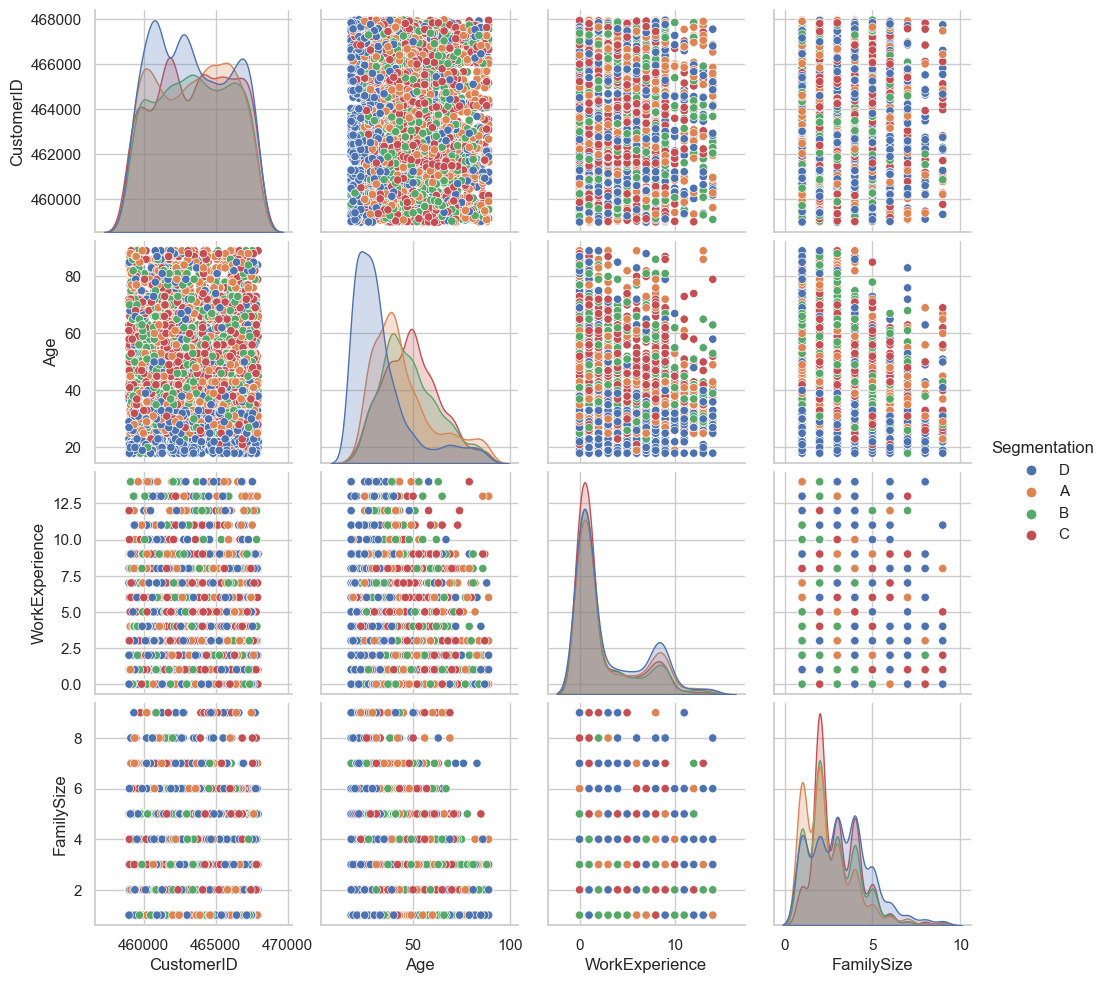

In [160]:
sns.pairplot(train_data, hue='Segmentation')
plt.show()

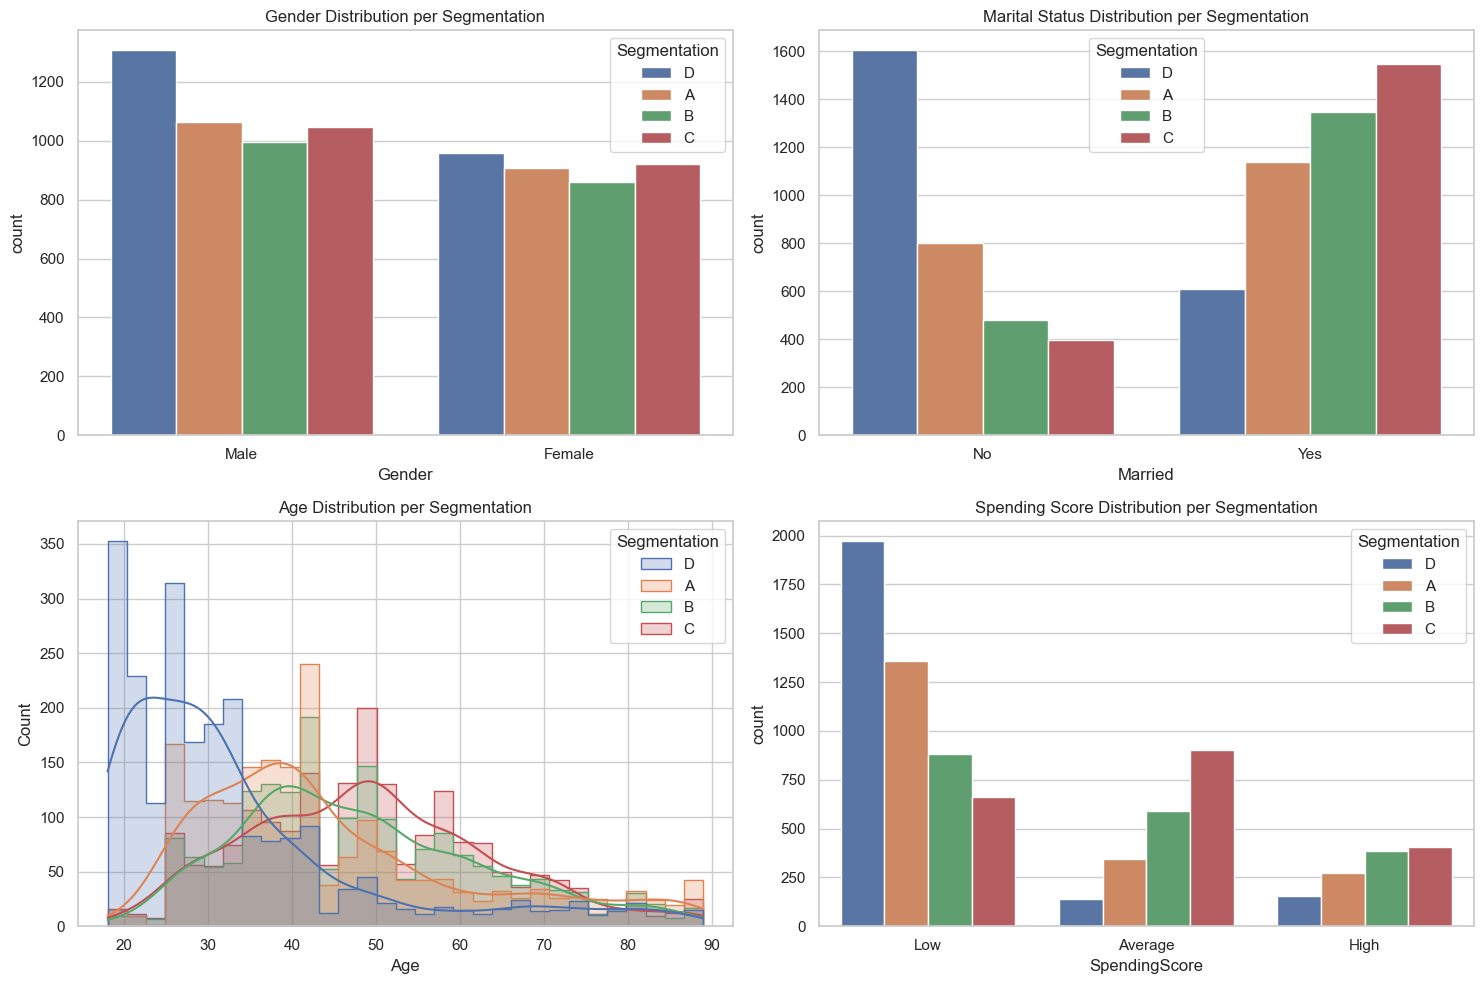

In [161]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plotting distributions and count plots for various features against the target variable 'Segmentation'
sns.countplot(x='Gender', hue='Segmentation', data=train_data, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution per Segmentation')

sns.countplot(x='Married', hue='Segmentation', data=train_data, ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Distribution per Segmentation')

sns.histplot(train_data, x='Age', hue='Segmentation', kde=True, element="step", ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution per Segmentation')

sns.countplot(x='SpendingScore', hue='Segmentation', data=train_data, ax=axes[1, 1])
axes[1, 1].set_title('Spending Score Distribution per Segmentation')

# Adjusting layout
plt.tight_layout()

# Display the plots
plt.show()

In [162]:
# Basic Information
info = train_data.info()
print("Information about the train dataset:\n", info)

# Summary statistics for numerical columns
summary_stats = train_data.describe()

# Checking for missing values
missing_values = train_data.isnull().sum()

# Returning summary statistics and missing values
summary_stats, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      8068 non-null   int64  
 1   Gender          8068 non-null   object 
 2   Married         7928 non-null   object 
 3   Age             8068 non-null   int64  
 4   Graduated       7990 non-null   object 
 5   Profession      7944 non-null   object 
 6   WorkExperience  7239 non-null   float64
 7   SpendingScore   8068 non-null   object 
 8   FamilySize      7733 non-null   float64
 9   Category        7992 non-null   object 
 10  Segmentation    8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
Information about the train dataset:
 None


(          CustomerID          Age  WorkExperience   FamilySize
 count    8068.000000  8068.000000     7239.000000  7733.000000
 mean   463479.214551    43.466906        2.641663     2.850123
 std      2595.381232    16.711696        3.406763     1.531413
 min    458982.000000    18.000000        0.000000     1.000000
 25%    461240.750000    30.000000        0.000000     2.000000
 50%    463472.500000    40.000000        1.000000     3.000000
 75%    465744.250000    53.000000        4.000000     4.000000
 max    467974.000000    89.000000       14.000000     9.000000,
 CustomerID          0
 Gender              0
 Married           140
 Age                 0
 Graduated          78
 Profession        124
 WorkExperience    829
 SpendingScore       0
 FamilySize        335
 Category           76
 Segmentation        0
 dtype: int64)

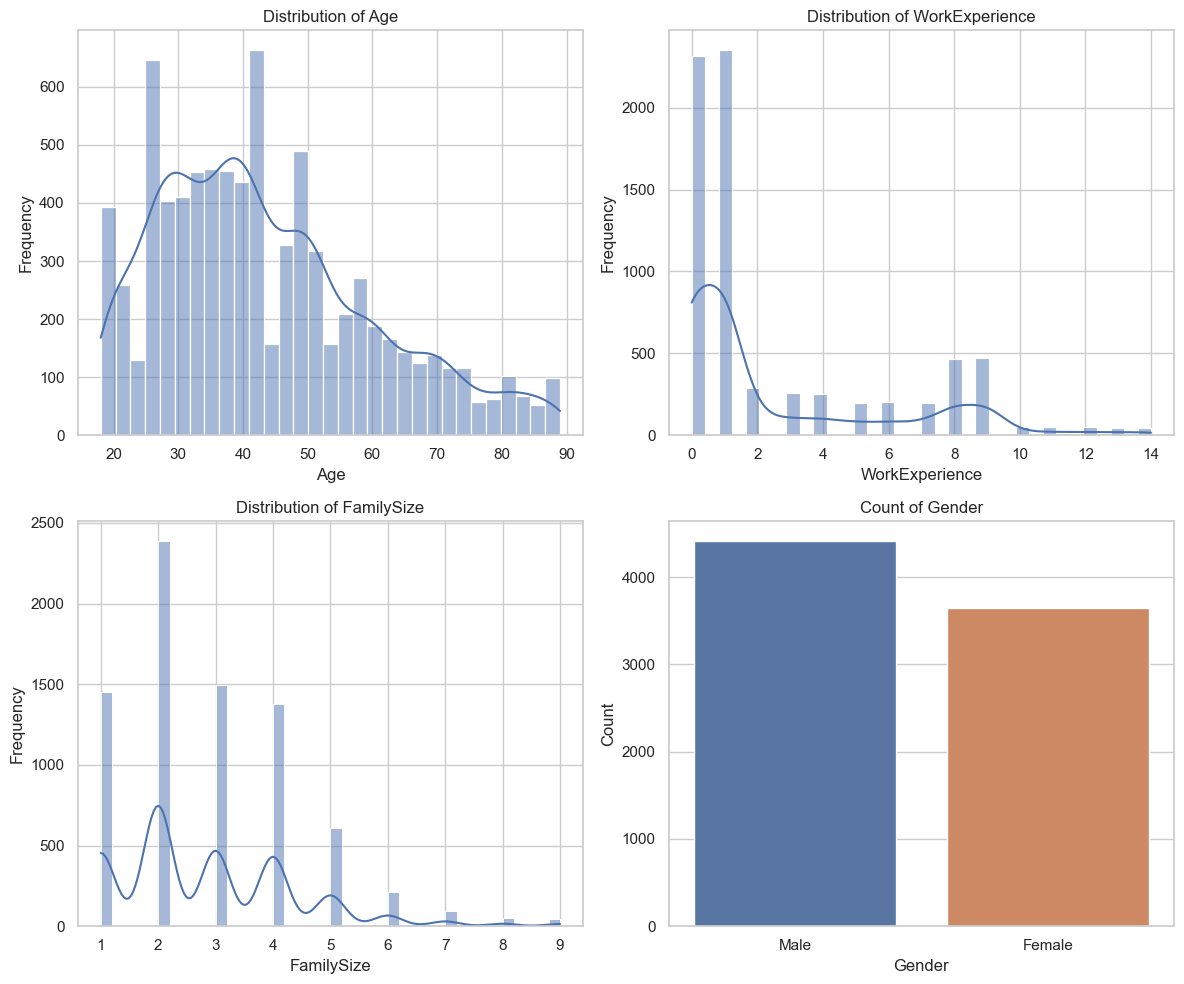

In [163]:
# Visualizations for Distribution of Numerical Features
def plot_distribution(df, column, ax):
    sns.histplot(df[column].dropna(), kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_ylabel('Frequency')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plot_distribution(train_data, 'Age', axes[0,0])
plot_distribution(train_data, 'WorkExperience', axes[0,1])
plot_distribution(train_data, 'FamilySize', axes[1,0])

# Visualizations for Categorical Features
def plot_count(df, column, ax):
    sns.countplot(data=df, x=column, ax=ax)
    ax.set_title(f'Count of {column}')
    ax.set_ylabel('Count')

plot_count(train_data, 'Gender', axes[1,1])

# Displaying the plots
plt.tight_layout()

# Data Preprocessing

## Separate feature and target variables

In [164]:
from sklearn.preprocessing import LabelEncoder

# Separating features and target variable
X = train_data.drop('Segmentation', axis=1)
y = train_data['Segmentation']
y=LabelEncoder().fit_transform(y)
map={3:"D",0:"A",1:"B",2:"C"}

## Train and validation set split

In [165]:
# Splitting the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Numerical Features

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Identifying numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

## Categorical Features

In [167]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identifying categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

## Preprocessing Pipeline

In [168]:
from sklearn.compose import ColumnTransformer

# Combining pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


# Analysis

## Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Logistic Regression Pipeline
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k='all')),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# hyperparameter grid
param_grid = {
    'feature_selection__k': [6, 8, 10], 
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

# grid search with cross-validation
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(pipeline_lr, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Model training
grid_search.fit(X_train, y_train)

# best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

# Evaluate the model on the validation set
y_val_pred = grid_search.predict(X_val)
print(classification_report(y_val, y_val_pred))
#check overfitting on training data
print(classification_report(y_train, grid_search.predict(X_train)))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters:  {'classifier__C': 0.1, 'feature_selection__k': 8}
Best cross-validated score:  0.49410804676382103
              precision    recall  f1-score   support

           0       0.37      0.42      0.39       391
           1       0.41      0.17      0.24       369
           2       0.45      0.59      0.51       380
           3       0.63      0.69      0.66       474

    accuracy                           0.48      1614
   macro avg       0.46      0.47      0.45      1614
weighted avg       0.47      0.48      0.46      1614

              precision    recall  f1-score   support

           0       0.40      0.46      0.43      1581
           1       0.39      0.16      0.23      1489
           2       0.50      0.62      0.55      1590
           3       0.62      0.70      0.66      1794

    accuracy                           0.50      6454
   macro avg       0.48      0.49      0.47      6454
weighte

## Random Forest Classifier

In [170]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline with RandomForestClassifier
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid for RandomForest
param_grid_rf = {
    'feature_selection__k': [6, 8, 10],  
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# grid search with cross-validation
cv = StratifiedKFold(n_splits=5)
grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Best parameters and estimator
print("Best parameters: ", grid_search_rf.best_params_)
print("Best cross-validated score: ", grid_search_rf.best_score_)

# Evaluate the model on the validation set
y_val_pred_rf = grid_search_rf.predict(X_val)
print(classification_report(y_val, y_val_pred_rf))
# Check for overfitting
print(classification_report(y_train, grid_search_rf.predict(X_train)))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300, 'feature_selection__k': 10}
Best cross-validated score:  0.5140973585766696
              precision    recall  f1-score   support

           0       0.40      0.41      0.40       391
           1       0.40      0.30      0.34       369
           2       0.51      0.53      0.52       380
           3       0.62      0.70      0.66       474

    accuracy                           0.50      1614
   macro avg       0.48      0.49      0.48      1614
weighted avg       0.49      0.50      0.49      1614

              precision    recall  f1-score   support

           0       0.54      0.57      0.56      1581
           1       0.53      0.41      0.46      1489
           2       0.63      0.60      0.62      1590
           3       0.67      0.78      0.72      1794

    accuracy                         

## SVM

In [171]:
from sklearn.svm import SVC

# Pipeline with SVM
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif)),
    ('classifier', SVC(random_state=42))
])

# Hyperparameter grid for SVM
param_grid_svm = {
    'feature_selection__k': [6, 8, 10], 
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__kernel': ['linear', 'rbf', 'poly']
}

# grid search with cross-validation
cv = StratifiedKFold(n_splits=5)
grid_search_svm = GridSearchCV(pipeline_svm, param_grid=param_grid_svm, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Best parameters and estimator
print("Best parameters: ", grid_search_svm.best_params_)
print("Best cross-validated score: ", grid_search_svm.best_score_)

# Evaluate the model on the validation set
y_val_pred_svm = grid_search_svm.predict(X_val)

print(classification_report(y_val, y_val_pred_svm))
# Check overfitting
print(classification_report(y_train, grid_search_svm.predict(X_train)))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters:  {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'feature_selection__k': 10}
Best cross-validated score:  0.5198303100174734
              precision    recall  f1-score   support

           0       0.39      0.45      0.42       391
           1       0.39      0.26      0.31       369
           2       0.50      0.54      0.52       380
           3       0.64      0.69      0.66       474

    accuracy                           0.50      1614
   macro avg       0.48      0.48      0.48      1614
weighted avg       0.49      0.50      0.49      1614

              precision    recall  f1-score   support

           0       0.46      0.54      0.50      1581
           1       0.45      0.32      0.37      1489
           2       0.57      0.58      0.57      1590
           3       0.65      0.70      0.68      1794

    accuracy                           0.54      6454
  

## K-Nearest Neighbors (KNN)

In [172]:
from sklearn.neighbors import KNeighborsClassifier

# Pipeline with KNN
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif)),
    ('classifier', KNeighborsClassifier())
])

# Hyperparameter grid for KNN
param_grid_knn = {
    'feature_selection__k': [6, 8, 10],  
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# grid search with cross-validation
cv = StratifiedKFold(n_splits=5)
grid_search_knn = GridSearchCV(pipeline_knn, param_grid=param_grid_knn, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Best parameters and estimator
print("Best parameters: ", grid_search_knn.best_params_)
print("Best cross-validated score: ", grid_search_knn.best_score_)

# Evaluate the model on the validation set
y_val_pred_knn = grid_search_knn.predict(X_val)
print(classification_report(y_val, y_val_pred_knn))
# Check overfitting
print(classification_report(y_train, grid_search_knn.predict(X_train)))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters:  {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 7, 'classifier__weights': 'uniform', 'feature_selection__k': 10}
Best cross-validated score:  0.47830730339440003
              precision    recall  f1-score   support

           0       0.37      0.44      0.40       391
           1       0.40      0.34      0.37       369
           2       0.50      0.48      0.49       380
           3       0.61      0.62      0.62       474

    accuracy                           0.48      1614
   macro avg       0.47      0.47      0.47      1614
weighted avg       0.48      0.48      0.48      1614

              precision    recall  f1-score   support

           0       0.51      0.63      0.57      1581
           1       0.52      0.44      0.47      1489
           2       0.64      0.57      0.60      1590
           3       0.70      0.72      0.71      1794

    accuracy                        

## Gradient Boosting Classifier

In [173]:
from sklearn.ensemble import GradientBoostingClassifier

# Pipeline with Gradient Boosting Classifier
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'feature_selection__k': [6, 8, 10],  
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# grid search with cross-validation
cv = StratifiedKFold(n_splits=5)
grid_search_gb = GridSearchCV(pipeline_gb, param_grid=param_grid_gb, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Best parameters and estimator
print("Best parameters: ", grid_search_gb.best_params_)
print("Best cross-validated score: ", grid_search_gb.best_score_)

# Evaluate the model on the validation set
y_val_pred_gb = grid_search_gb.predict(X_val)
print(classification_report(y_val, y_val_pred_gb))
# Check overfitting
print(classification_report(y_train, grid_search_gb.predict(X_train)))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters:  {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'feature_selection__k': 10}
Best cross-validated score:  0.5193659142903464
              precision    recall  f1-score   support

           0       0.41      0.46      0.43       391
           1       0.42      0.26      0.32       369
           2       0.52      0.58      0.55       380
           3       0.65      0.70      0.67       474

    accuracy                           0.51      1614
   macro avg       0.50      0.50      0.49      1614
weighted avg       0.51      0.51      0.51      1614

              precision    recall  f1-score   support

           0       0.48      0.53      0.50      1581
           1       0.46      0.30      0.36      1489
           2       0.58      0.61      0.59      1590
           3       0.65      0.73      0.69      1794

    accuracy                           0

## XGBClassifier

In [174]:
from xgboost import XGBClassifier

# Pipeline with XGBClassifier
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif)),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
])

# Hyperparameter grid for XGBClassifier
param_grid_xgb = {
    'feature_selection__k': [6, 8, 10],  
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_child_weight': [1, 2, 3]
}

# grid search with cross-validation
cv = StratifiedKFold(n_splits=5)
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid=param_grid_xgb, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Best parameters and estimator
print("Best parameters: ", grid_search_xgb.best_params_)
print("Best cross-validated score: ", grid_search_xgb.best_score_)

# Evaluate the model on the validation set
y_val_pred_xgb = grid_search_xgb.predict(X_val)
print(classification_report(y_val, y_val_pred_xgb))
# Check overfitting
print(classification_report(y_train, grid_search_xgb.predict(X_train)))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters:  {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 300, 'feature_selection__k': 10}
Best cross-validated score:  0.5181260845807889
              precision    recall  f1-score   support

           0       0.40      0.47      0.43       391
           1       0.41      0.26      0.32       369
           2       0.53      0.56      0.54       380
           3       0.64      0.71      0.67       474

    accuracy                           0.51      1614
   macro avg       0.49      0.50      0.49      1614
weighted avg       0.50      0.51      0.50      1614

              precision    recall  f1-score   support

           0       0.46      0.53      0.49      1581
           1       0.43      0.29      0.35      1489
           2       0.58      0.58      0.58      1590
           3       0.64      0.73      0.68      1794

   